# Exam of Machine Learning

Name: You ZUO

University: ENSIIE

Formation: Double diplome of M2IA


## Exo 1
### The Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

tab=pd.read_csv('cluster1.txt',sep=';',header=None) 
X=np.array(tab)
N,p=np.shape(X)
print(N,p)

100 2


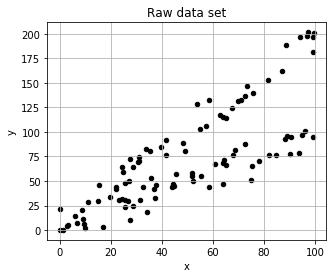

In [2]:
# visulization of data
figure = plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], s=20,c="k")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Raw data set"); 
plt.grid();plt.show()

### I.A Clustering pre-processed data

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.axes_grid1 import make_axes_locatable

# PCA on raw data
pca = PCA(n_components=2); 
x_pca = pca.fit_transform(X)

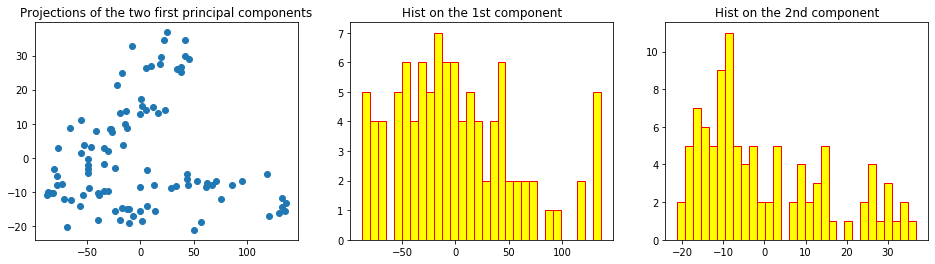

In [4]:
figure = plt.figure(figsize=(16,4))
ax = plt.subplot(1,3,1); plt.scatter(x_pca[:,0],x_pca[:,1])
plt.title('Projections of the two first principal components')

# image histogram
ax = plt.subplot(1,3,2)
plt.hist(x_pca[:,0],  bins = 30, color = 'yellow', edgecolor = 'red')
plt.title('Hist on the 1st component')

ax = plt.subplot(1,3,3)
plt.hist(x_pca[:,1],  bins = 30, color = 'yellow', edgecolor = 'red')
plt.title('Hist on the 2nd component')
plt.show()

A.2 **ANSWER**

The second component is more appropriate to do the cluster. 

Because from the chart above we can see that, the data are more seperated in the second axes and can be easily put a segmentation (at about 5 or 20) to have two clusters.


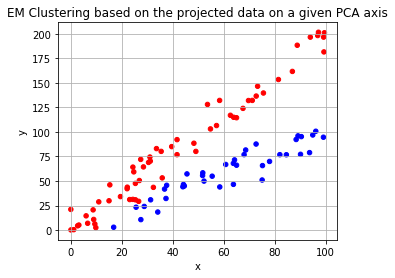

In [5]:
# A.3a Use the Gaussian Mixture Models (GMM) clustering algorithm to cluster the projected observations on the previous chosen PCA axis. Recall the GMM model used and provide the estimated parameters of the model.

from sklearn import mixture
# chosen axis of PCA
X1 = x_pca[:,1].reshape(-1, 1)

modgmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
fitgmm=modgmm.fit(X1);predX=fitgmm.fit_predict(X1)

#Display
colors = np.array(['blue','red'])
figure = plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], s=20,c=colors[predX])
plt.xlabel("x"); plt.ylabel("y"); plt.title("EM Clustering based on the projected data on a given PCA axis"); 
plt.grid();plt.show()

**A.3b** We aim now at model the observations in each group. What model do you advice to propose? Estimate the parameters of the models in each group and provide the final estimated model in each group.

**A.3b Answer**: Here we proposed a linear regression for each cluster since we have obseved a linear trend for clusters of our raw data.

In [6]:
from sklearn.linear_model import LinearRegression

cluster1 = X[predX==0]; cluster1X = cluster1[:,0].reshape(-1,1); cluster1y = cluster1[:,1].reshape(-1,1)

cluster2 = X[predX==1]; cluster2X = cluster2[:,0].reshape(-1,1); cluster2y = cluster2[:,1].reshape(-1,1)

reg1 = LinearRegression().fit(cluster1X, cluster1y)
reg2 = LinearRegression().fit(cluster2X, cluster2y)

slope1 = reg1.coef_[0][0]; intercept1 = reg1.intercept_[0]
slope2 = reg2.coef_[0][0]; intercept2 = reg2.intercept_[0]

print("Linear Regression for cluster 1: {}x + {}".format(slope1,intercept1))
print("Linear Regression for cluster 2: {}x + {}".format(slope2,intercept2))

Linear Regression for cluster 1: 1.0236698385371796x + -3.1207413423010806
Linear Regression for cluster 2: 1.9632167491917096x + -0.3555905055759041


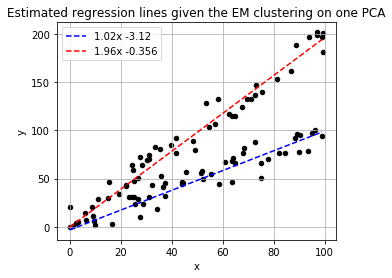

In [7]:
# Create a list of values in the best fit line
abline_values1 = [slope1* i + intercept1 for i in range(100)]
abline_values2 = [slope2 * i + intercept2 for i in range(100)]

# visulization
fig = plt.figure(figsize=(5,4))
ax = plt.axes()

ax.scatter(X[:, 0], X[:, 1], s=20,c="k")
ax.plot(range(100), abline_values1, 'b--', label = "{:.3}x {:.3}".format(slope1,intercept1))
ax.plot(range(100), abline_values2, 'r--', label = "{:.3}x {:.3}".format(slope2,intercept2))
plt.grid(); plt.xlabel("x"); plt.ylabel("y"); plt.title("Estimated regression lines given the EM clustering on one PCA"); 
plt.legend();plt.show()

A.4a Use the K-means algorithm to cluster the projected data on the previous chosen PCA axis.

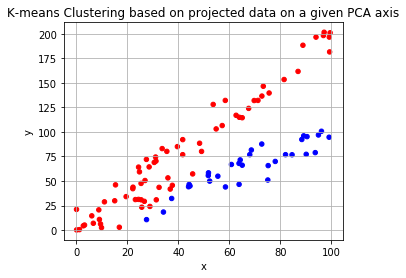

In [8]:
from sklearn.cluster import KMeans

# chosen axis of PCA
X1 = x_pca[:,1].reshape(-1, 1)

kmeans = KMeans(n_clusters=2).fit(X1)
kmeansres = kmeans.labels_

#Display
colors = np.array(['blue','red'])
figure = plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], s=20,c=colors[kmeansres])
plt.xlabel("x"); plt.ylabel("y"); plt.title("K-means Clustering based on projected data on a given PCA axis"); 
plt.grid();plt.show()

**A.4b** We aim now at model the observations in each group. What model do you advice to propose? Estimate the parameters of the models in each group and provide the final estimated model in each group.

**A.4b Answer**: We propose again a linear regression for each group because we observed linear trends for both cluters in the graph above.

In [9]:
cluster1 = X[kmeansres==0]; cluster1X = cluster1[:,0].reshape(-1,1); cluster1y = cluster1[:,1].reshape(-1,1)
cluster2 = X[kmeansres==1]; cluster2X = cluster2[:,0].reshape(-1,1); cluster2y = cluster2[:,1].reshape(-1,1)

reg1 = LinearRegression().fit(cluster1X, cluster1y)
reg2 = LinearRegression().fit(cluster2X, cluster2y)

slope1 = reg1.coef_[0][0]; intercept1 = reg1.intercept_[0]
slope2 = reg2.coef_[0][0]; intercept2 = reg2.intercept_[0]

print("Linear Regression for cluster 1: {}x + {}".format(slope1,intercept1))
print("Linear Regression for cluster 2: {}x + {}".format(slope2,intercept2))

Linear Regression for cluster 1: 1.0443111096825988x + -5.135233180845262
Linear Regression for cluster 2: 1.99696460968359x + -4.8031562402780565


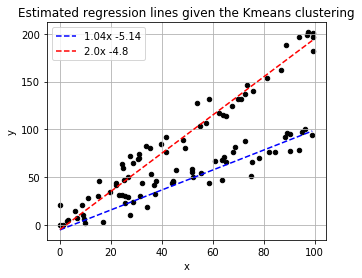

In [10]:
# Create a list of values in the best fit line
abline_values1 = [slope1* i + intercept1 for i in range(100)]
abline_values2 = [slope2 * i + intercept2 for i in range(100)]

# visulization
fig = plt.figure(figsize=(5,4))
ax = plt.axes()

ax.scatter(X[:, 0], X[:, 1], s=20,c="k")
ax.plot(range(100), abline_values1, 'b--', label = "{:.3}x {:.3}".format(slope1,intercept1))
ax.plot(range(100), abline_values2, 'r--', label = "{:.3}x {:.3}".format(slope2,intercept2))
plt.grid(); plt.xlabel("x"); plt.ylabel("y"); plt.title("Estimated regression lines given the Kmeans clustering"); 
plt.legend(); plt.show()

**A.5. Conclusion**

After implementing pca, we obtained two main components. From the results of pca we can see that the second component could be helpful to split our data because there is "an obvious gap". 

Besides, we can see that both GMM and Kmeans can well split our pre-processed data into two clusters based on a chosen pca component. 

Even though there were some discrepancies for the linear regression lines of two different clusters methods, they all well depicted our data trends.

### I.B. Clustering raw data

B.1 Propose and justify the use of Gaussian Mixture Modelling (GMM) to cluster the observations.

**ANSWER B.1:** 

GMM is an unsupervised method, where we suppose that our data follow a mixure Gaussian distribution. 

On top of that, an advantage is that GMM counts for the variance in different axis, which means that Gaussian mixture models can handle even clusters in the shape of an eclipse.

It will help a lot for doing clustering based on our raw data. Since our raw data distribute in a very long and slim shape, which could be very hard for kmeans to cluster.

B.2 What parameters do you propose to consider for this GMM?

**ANSWER B.2:** 

covariance_type='full' (count variances as parameters)

init_params='random' (initilization in method of GMM)

B.3 Explain how it is possible to estimate the parameters using the Expectation Maximization algorithm

**ANSWER B.3**:

To remind, the EM algorithme is contructed by 4 main steps:

1. **Initialization**: fix our $k=2$, and initialize randomly the paramters $\mu_k,\Sigma_k,\pi_k$ for each $k$
2. **Expectation Step**: compute the responsibilities matrix for each $i$ and $k$ where:
$$\gamma_{ik}=\frac{\pi_k \mathcal{N}(x_i;\mu_k,\Sigma_k)}{\sum_{j}\pi_j \mathcal{N}(x_i;\mu_j,\Sigma_j)}$$
3. **Maximazition Step**: for each cluster $k$, update the parameters which optimize the loglikelihood:
\begin{align}
\pi_k& = \frac{m_{k}}{m} \\
\mu_k & = \frac{1}{m_k} \sum_{i} \gamma_{ik}x^{(i)} \\
\Sigma_k & = \frac{1}{m_k} \sum_{i} \gamma_{ik} (x^{(i)} - \mu_k)^T (x^{(i)} - \mu_k)
\end{align}
where $m_k=\sum_{i}\gamma_{ik}$ is the responsibility of cluster $k$, and $m=\sum_{k} m_k$

4. **Convergence**: repeat the step 2 and 3 until all the parameters convergence

B.4 Implement the EM algorithm to automatically compute the two underlaying clusters.

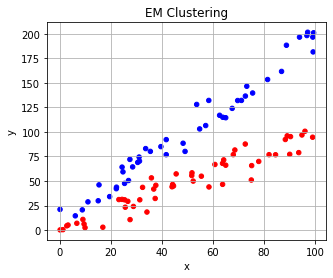

In [11]:
modgmm = mixture.GaussianMixture(n_components=2, covariance_type='full', init_params='random')
fitgmm=modgmm.fit(X);gmmres=fitgmm.fit_predict(X)

#Display
colors = np.array(['blue','red'])
figure = plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], s=20,c=colors[gmmres])
plt.xlabel("x"); plt.ylabel("y"); plt.title("EM Clustering"); 
plt.grid();plt.show()

B.5 Use your algorithm to compute for each cluster, the parameters of the underlaying linear model.

In [12]:
cluster1 = X[gmmres==0]; cluster1X = cluster1[:,0].reshape(-1,1); cluster1y = cluster1[:,1].reshape(-1,1)
cluster2 = X[gmmres==1]; cluster2X = cluster2[:,0].reshape(-1,1); cluster2y = cluster2[:,1].reshape(-1,1)

reg1 = LinearRegression().fit(cluster1X, cluster1y)
reg2 = LinearRegression().fit(cluster2X, cluster2y)

slope1 = reg1.coef_[0][0]; intercept1 = reg1.intercept_[0]
slope2 = reg2.coef_[0][0]; intercept2 = reg2.intercept_[0]

print("Linear Regression for cluster 1: {}x + {}".format(slope1,intercept1))
print("Linear Regression for cluster 2: {}x + {}".format(slope2,intercept2))

Linear Regression for cluster 1: 1.8570482974517046x + 8.16034712790281
Linear Regression for cluster 2: 0.9750281492324605x + 0.8602240033586384


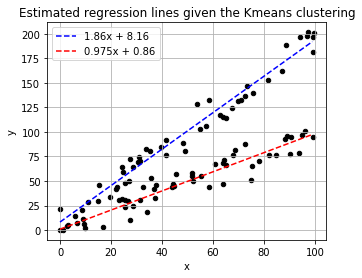

In [13]:
# Create a list of values in the best fit line
abline_values1 = [slope1* i + intercept1 for i in range(100)]
abline_values2 = [slope2 * i + intercept2 for i in range(100)]

# visulization
fig = plt.figure(figsize=(5,4))
ax = plt.axes()

ax.scatter(X[:, 0], X[:, 1], s=20,c="k")
ax.plot(range(100), abline_values1, 'b--', label = "{:.3}x + {:.3}".format(slope1,intercept1))
ax.plot(range(100), abline_values2, 'r--', label = "{:.3}x + {:.3}".format(slope2,intercept2))
plt.grid(); plt.xlabel("x"); plt.ylabel("y"); plt.title("Estimated regression lines given the Kmeans clustering"); 
plt.legend(); plt.show()

From the results we can see that, gmm can also well depicted our data into two clusters withour pre-processing.

### II. Signals representation for data mining.

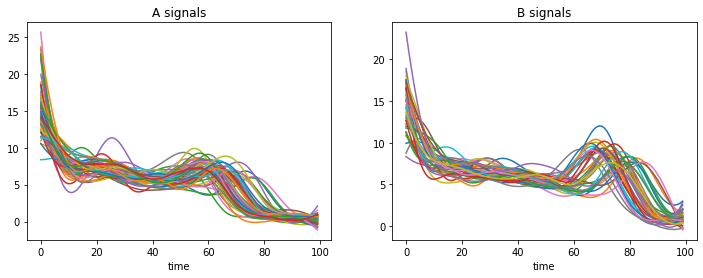

In [14]:
import csv
tabA = pd.read_csv("signalA.csv",header=1); tabA=np.array(tabA); tabA=np.transpose(tabA[:,1:55]); n1,p1=np.shape(tabA)
tabB = pd.read_csv("signalB.csv",header=1); tabB=np.array(tabB); tabB=np.transpose(tabB[:,1:40]); n2,p2=np.shape(tabB)

# visulization 
figure = plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1); 
for i in range(n1):
    plt.plot(tabA[i,:])
plt.xlabel("time"); ax.set_title('A signals')

ax = plt.subplot(1,2,2)
for i in range(n2):
    plt.plot(tabB[i,:])
plt.xlabel("time"); ax.set_title('B signals')
plt.show()

C.1 Compute the sample mean of each dataset, A, B and C, and compare them. Do you think they could be assumed to have the same mean pattern?

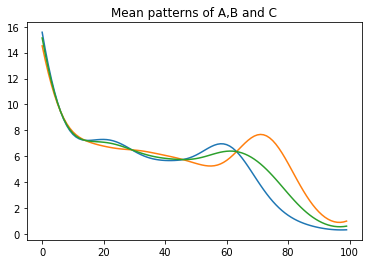

In [15]:
tabC = np.concatenate([tabA,tabB])

meanA = tabA.mean(axis=0)
meanB = tabB.mean(axis=0)
meanC = tabC.mean(axis=0)

plt.plot(meanA);plt.plot(meanB);plt.plot(meanC)
plt.title("Mean patterns of A,B and C")
plt.show()

**ANSWER C.1**: It seems the mean patterns are very close at the first half period and at the end. But they they have some fierce variations from the middle to the tail, so we can guess that they may not have the same mean pattern.

C.2 Perform principal component analysis to find a parsimonious representation of the signals. Display the first 4 components and describe characteristics of those components, by commenting on similarities and differences in the shape of the components.

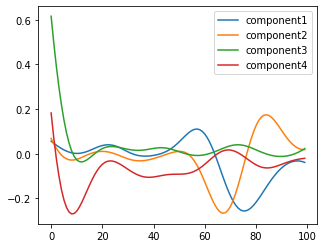

In [16]:
pca = PCA(); pca.fit(tabC) 

k = 4

figure = plt.figure(figsize=(5,4))
for i in range(k):
    plt.plot(pca.components_[i,:],label = 'component'+ str(i+1))
    
ax.set_title('First 4 Eigenvectors');plt.legend();plt.show()

**ANSWER C.2**: 

From the plot above we can see that the four components have four different trends.

The first component is the most informative component. We can see that it is relatively stable at the head, but from the middle to the tail, it first rises and then falls. A large part of our signals follow this trend.

The second component is somewhat opposite to the first component. The head is also relatively stable, but in the middle and rear parts it first drops and then rises. Although it may not be as representative as the first part, it represents actually the trend of another part of the signal.

The third component represents the information of the start time period, that most signals suddenly drop from a very high point to an intermediate frequency at the first seconds.

The fourth component also represents the information of the head, but it more describes the signal characteristics of the second sharp drop in the head (at about the 5th seconds). Then it has two small waves at $t=20$ and $t=70$ seperately.

C.3 Find an approximate representation of the signal using the finite number of components that can explain at least (1) 85% and (2) 95% of the total variability in the data. Is there any difference between these two representations? Select two signals from the dataset and visualize the approximation as the number of the components increases.
Comment on the quality of the approximations.

In [17]:
# accumulative variance
cum_explained_var = []
for i in range(len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 

                                 cum_explained_var[i-1])
# print the first 10 of acum variance
cum_explained_var[:10]

[0.48822889096743527,
 0.6726121717727653,
 0.794745336580485,
 0.8572679844101312,
 0.8991271496609424,
 0.9334279337184523,
 0.9556828571426039,
 0.9723227572176484,
 0.9841812020443789,
 0.9907221737039112]

**ANSWER C.3 1**:

To have a 85% total variability, we need to pick the **first 4 principle compoments**. 

And if we want to have a 95% total variability, we need to pick **the first 7 principle compoments**.

In [18]:
from sklearn.metrics import mean_squared_error

def reconstruct_kcomp(data, components, target, k):
    # standarization of the targeting data (**subtraction by components)
    target_adjust = target - data.mean(axis=0)

    # projection on the first k eigen vector
    selectVec = np.matrix(components[:k])
    finalData = target_adjust @ selectVec.T

    # reconstruction with the first k eigenvecs
    reconData = (finalData @ selectVec) + data.mean(axis=0).reshape(1,len(target)) 

    # compute the quadratic errors between each initial signal and its reconstruction
    error = mean_squared_error(target, reconData.T)

    return (finalData, reconData, error)

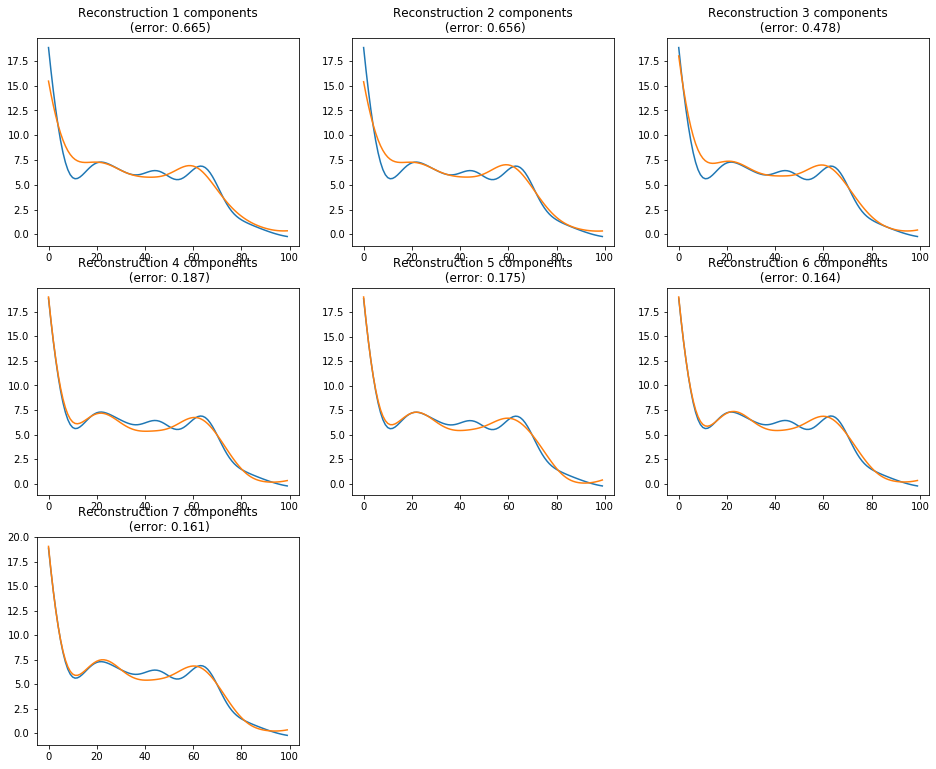

In [19]:
# select the first signal of tabC
target = tabC[1,:]; errors1 = []

figure = plt.figure(figsize=(16,13))
for i in range(7):
    _, recon, error = reconstruct_kcomp(data=tabC,target=target,k=i+1,components=pca.components_)
    errors1.append(error)

    ax = plt.subplot(3,3,i+1); plt.plot(target); plt.plot(recon.T)
    ax.set_title('Reconstruction {} components\n (error: {:.3})'.format(i+1,error))

plt.show()

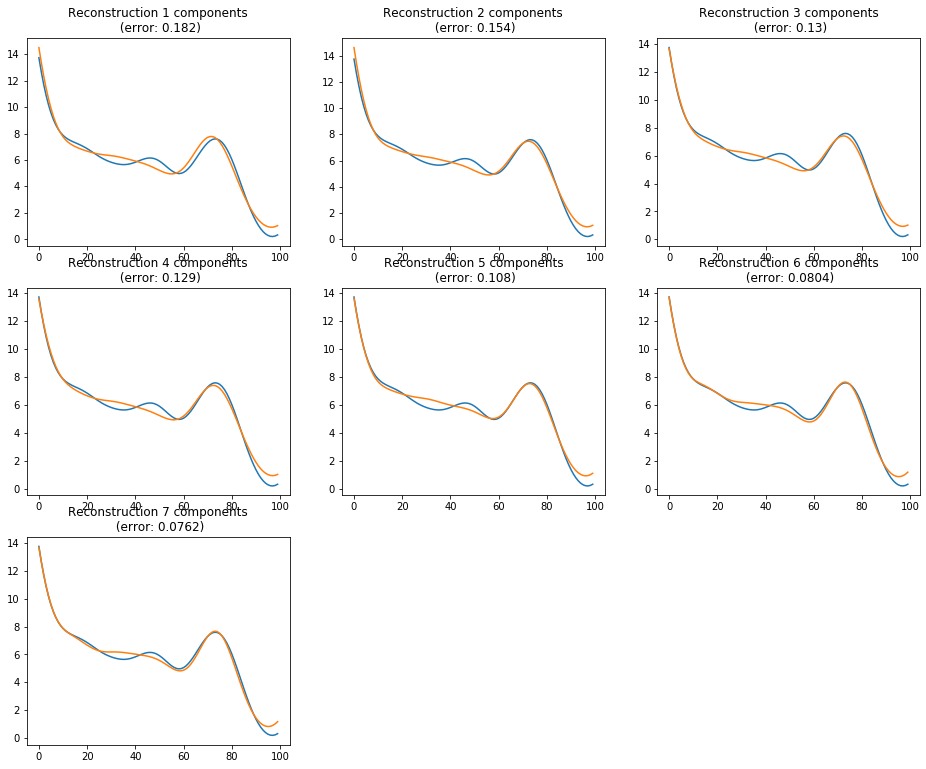

In [20]:
# select the last signal of tabC
target = tabC[n1+n2-1,:]; errors2 = []

figure = plt.figure(figsize=(16,13))
for i in range(7):
    _, recon, error = reconstruct_kcomp(data=tabC,target=target,k=i+1,components=pca.components_)
    errors2.append(error)

    ax = plt.subplot(3,3,i+1); plt.plot(target); plt.plot(recon.T)
    ax.set_title('Reconstruction {} components\n (error: {:.3})'.format(i+1,error))

plt.show()

**ANSWER C.3 2**:

Here we picked the first signal(from signalA) and the last signal(from signalB) of the tabC. From the charts and errors results we can see that, as the number of components increases, the accuracy of the fitting also increases, but the effect of each increase gradually decreases. Overall, the error is very small, and it can be considered that a small number of principal components can represent most of the information.

C.4 For the first 4 components you have found, examine the distribution of the projection coefficients for each component. Assess whether a normal distribution is a good approximation.

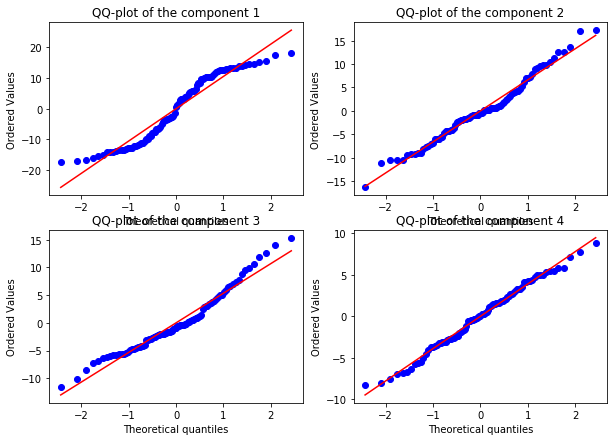

In [21]:
# Analyze the statistical distribution
import pylab
import scipy.stats as stats
pca = PCA(n_components=4)
x_pca = pca.fit_transform(tabC)

figure = plt.figure(figsize=(10,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1); 
    stats.probplot(x_pca[:,i], dist="norm", plot=pylab)
    plt.title('QQ-plot of the component {}'.format(i+1))
pylab.show()

In [22]:
# Shapiro Test, test if the empirical distributions of the 4 principal components are gaussian where ‘x_pca’ is the array containing the principal components values
from scipy.stats import shapiro 

for i in range(4):
    stat, p = shapiro(x_pca[:,i]) 
    print('For the component %i: stat=%.3f, p=%.3f' % (i+1, stat, p)) 
    if p > 0.05:
        print("Data follows Normal Distribution\n") 
    else:
        print("Data does not follow Normal Distribution\n")

For the component 1: stat=0.924, p=0.000
Data does not follow Normal Distribution

For the component 2: stat=0.980, p=0.173
Data follows Normal Distribution

For the component 3: stat=0.961, p=0.007
Data does not follow Normal Distribution

For the component 4: stat=0.988, p=0.579
Data follows Normal Distribution



**ANSWER C.4**:

From both the results of qq-plots and Shapiro test, we can conclude that component 2 and 4 follow a normal distribution. But for component 1 and 3, they do not satisfy the conditions to be a normal distribution.

C.5 For the first 4 component you have found above, make a scatter plot of the projection coefficients for each possible pairs: (1,2), (1,3), (1,4), (2,3), (2,4), (3,4). Use two different symbols to represent points from A and B. Examine the plots to see if there are any patterns associated with group labels (symbols). Based on your findings, do you think the datasets A and B could have come from the same population?

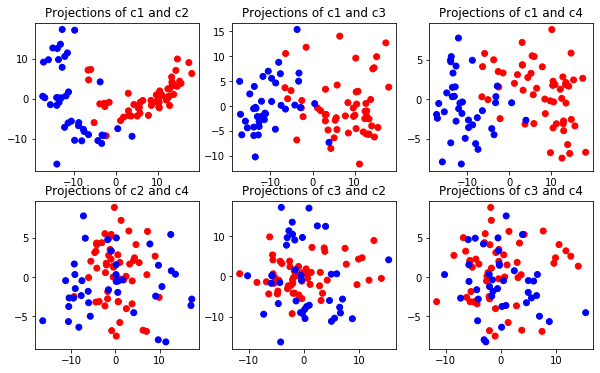

In [23]:
figure = plt.figure(figsize=(10,6))
cnt = 0
for i in range(0,3):
    for j in range(1,4):
        if i!=j and not(i==1 and j==2):
            ax = plt.subplot(2,3,cnt+1); cnt+=1
            plt.scatter(x_pca[:,i],x_pca[:,j],color = np.array(["red"]*n1 + ["blue"]*n2))
            plt.title('Projections of c{} and c{}'.format(i+1,j+1))
plt.show()

**ANSWER C.5**:

According to the pairs of projections of two components we can observe that Signal A and Signal B might have some hidden patterns. 

Because the combination of component 1 and other components (the three graphs of the first line) showed that the distributions of A and B are not the same, they are like two clusters and can be seperated.